# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlchecks.checks.leakage import *
from mlchecks.base import Dataset

# Generating data:

In [2]:
np.random.seed(42)
df = pd.DataFrame(np.random.randn(100, 3), columns=['x1', 'x2', 'x3'])
df['x4'] = df['x1'] * 0.5 + df['x2']
df['label'] = df['x2'] + 0.1 * df['x1']
df['x5'] = df['label'].apply(lambda x: 'v1' if x < 0 else 'v2')

In [3]:
ds = Dataset(df, label='label')

c:\users\nirhu\documents\deepchecks\mlchecks\mlchecks\base\dataset.py:56: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._features = [x for x in df.columns if x not in {label, index, date}]
c:\users\nirhu\documents\deepchecks\mlchecks\mlchecks\base\dataset.py:66: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._cat_features = self.infer_categorical_features()


# Running single_feature_contribution check:

{'x2': 0.841523366731384, 'x4': 0.5334285394903233, 'x5': 0.42269099121738773, 'x1': 0.0, 'x3': 0.0}

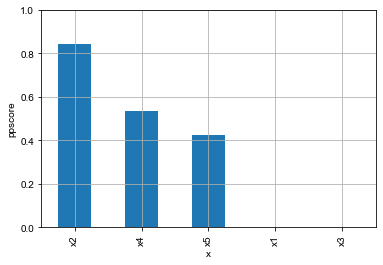

In [4]:
single_feature_contribution(ds)

# Using the SingleFeatureContribution check class:

{'x2': 0.658576620831202, 'x5': 0.4900350966763739, 'x4': 0.3255064112609285, 'x1': 0.0, 'x3': 0.0}

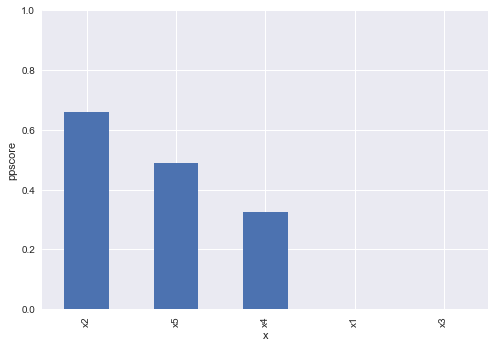

In [5]:
my_check = SingleFeatureContribution(ppscore_params={'sample': 10})
my_check.run(dataset=ds)

# Running single_feature_contribution_train_validation check:

In [11]:
df_validation = df.copy()
df_validation['x2'] = df['x2'] + 0.2 * df['x1']
df_validation['x3'] = df['x3'] + df['label']
ds_validation = Dataset(df_validation, label='label')

c:\users\nirhu\documents\deepchecks\mlchecks\mlchecks\base\dataset.py:56: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._features = [x for x in df.columns if x not in {label, index, date}]
c:\users\nirhu\documents\deepchecks\mlchecks\mlchecks\base\dataset.py:66: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._cat_features = self.infer_categorical_features()


{'x2': -0.0021739122185188142, 'x4': 0.0, 'x5': 0.0, 'x1': 0.0, 'x3': 0.0}

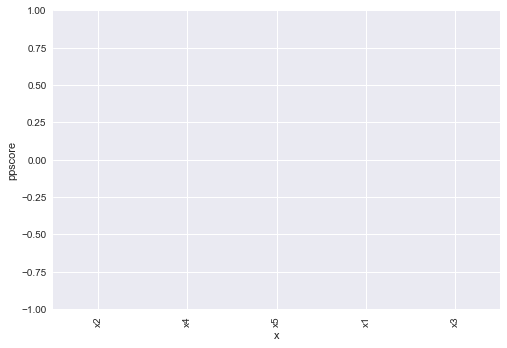

In [12]:
single_feature_contribution_train_validation(train_dataset=ds, validation_dataset=ds_validation)

# Using the SingleFeatureContributionTrainValidation check class:

{'x1': 0.0, 'x2': -0.012953003317687228, 'x3': 0.388834548683587, 'x4': 0.0, 'x5': -1.1102230246251565e-16}

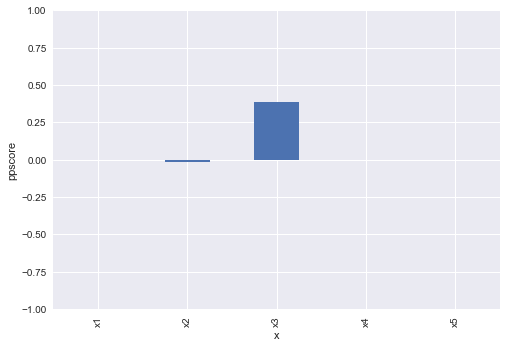

In [8]:
my_check = SingleFeatureContributionTrainValidation(ppscore_params={'sample': 10})
my_check.run(train_dataset=ds, validation_dataset=ds_validation)